In [423]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [424]:
x = np.random.randint(2, size=100)  #random binary sequence
N = len(x)
Tb = 0.000001;  # Data rate = 1MHz i.e., bit period (second)
print('Binary Input Information at Transmitter: ')
print(x)

Binary Input Information at Transmitter: 
[0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0]


In [425]:
nb = 100   # Digital signal per bit
sig = []
for i in range(0, N):
    if x[i] == 1:
        bit = [1 for g in range(nb)]
    elif x[i] == 0:
        bit = [0 for g in range(nb)]
    sig.extend(bit)

Text(0.5, 1.0, 'Digital signal')

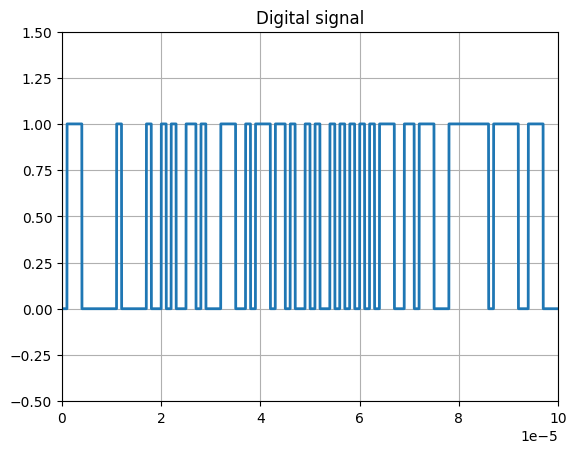

In [426]:
t = np.arange(Tb/nb, N*Tb + Tb/nb, Tb/nb)   # Time period
plt.plot(t, sig, linewidth=2)
plt.grid()
plt.axis([0, Tb*N, -0.5, 1.5])
plt.title('Digital signal')

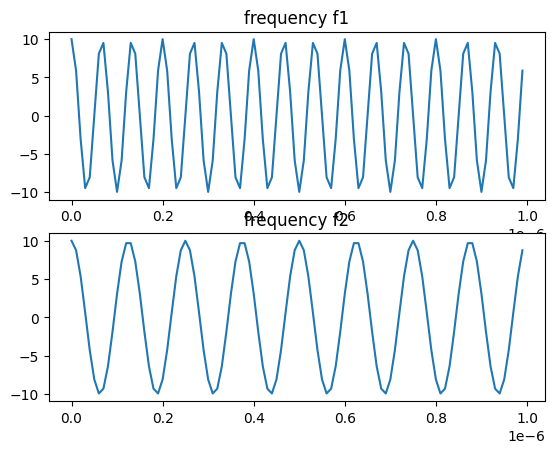

In [427]:
br = 1/Tb      # Bit rate
Fc1 = br*15    # Carrier frequency for binary input '1'
Fc2 = br*8     # Carrier frequency for binary input '0'
t2 = np.arange(0, Tb, Tb/nb)
y1 = 10*np.cos(2*pi*Fc1*t2)
y2 = 10*np.cos(2*pi*Fc2*t2)
figure, axis = plt.subplots(2)
axis[0].plot(t2, y1)
axis[0].set_title("frequency f1")
axis[1].plot(t2, y2)
axis[1].set_title("frequency f2")
plt.show()

In [428]:
br = 1/Tb      # Bit rate
Fc1 = br*10    # Carrier frequency for binary input '1'
Fc2 = br*8     # Carrier frequency for binary input '0'
t = np.arange(0, Tb, Tb/nb)   # Signal time
mod = []
for i in range(0, N):
    if x[i] == 1:
        # Modulation signal with carrier signal 1
        y = 10*np.cos(2*pi*Fc1*t)
    else:
        # Modulation signal with carrier signal 2
        y = 10*np.cos(2*pi*Fc2*t)
    mod.extend(y)

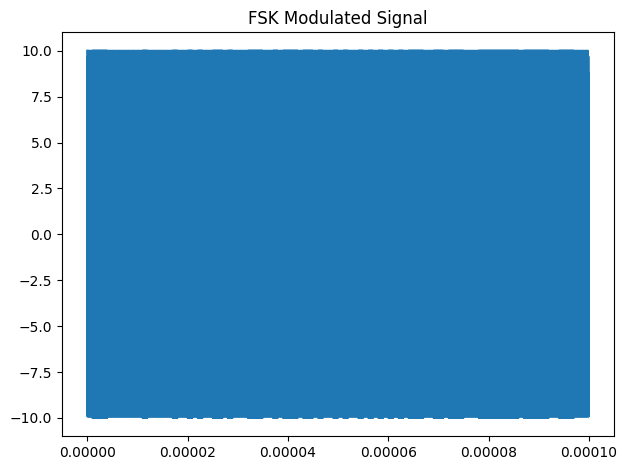

In [429]:
t = np.arange(0, Tb*N, Tb/nb)   # Time period
plt.plot(t, mod)
plt.title('FSK Modulated Signal')
plt.tight_layout()

In [430]:
h = 1;   # Signal fading
#w = 0;   # Noise
w = np.random.normal(loc=0, scale=3, size=(N * nb))
y = np.add(np.multiply(h, mod), w)  # r(t) = s(t) + n(t)

In [431]:
t2 = np.arange(0, Tb, Tb/nb)
t4 = np.arange(0, nb*len(x)*(Tb/nb), Tb/nb)
s=len(t2)
demod=[]
for n in range(0, len(y), s):
    t4 = np.arange(0, Tb, Tb/nb)  # Time period
    c1 = 10*np.cos(2*pi*Fc1*t4)      # carrier signal for binary value '1'
    c2 = 10*np.cos(2*pi*Fc2*t4)      # carrier siignal for binary value '0'
    mc1 = np.multiply(c1, y[n:n+s])             # Convolution
    mc2 = np.multiply(c2, y[n:n+s])             # Convolution
    t5 = np.arange(0, Tb, Tb/nb)
    z1 = np.trapz(t5, mc1)                      # Intregation
    z2 = np.trapz(t5, mc2)                      # Intregation
    rz1 = round(2*z1/Tb)
    rz2 = round(2*z2/Tb)
    if rz1 < 1/2:                               # Logical condition
        a = 1
    else:
        a = 0
    demod.append(a)

print('Demodulated Binary Information at Receiver: ')
print(demod)

Demodulated Binary Information at Receiver: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [432]:
receive_signal = []
for n in range(0, len(demod)):
    if demod[n] == 1:
        bit = [1 for i in range(nb)]
    elif demod[n] == 0:
        bit = [0 for i in range(nb)]
    receive_signal.extend(bit)

Text(0.5, 1.0, 'Output digital signal')

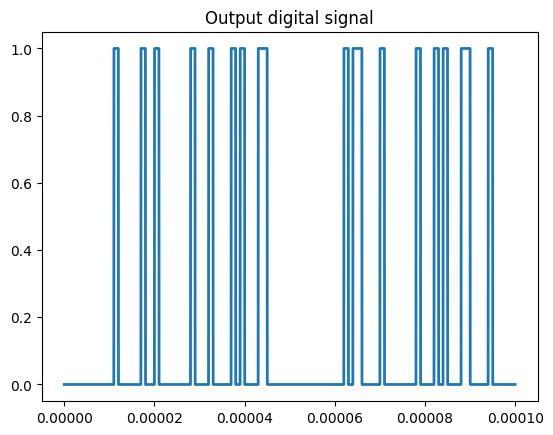

In [433]:
t4 = np.arange(0, len(demod)*Tb, Tb/nb)    # Time period
plt.plot(t4, receive_signal, linewidth=2)
plt.title('Output digital signal')

In [435]:
c1 = np.cos(2*pi*Fc1*t4)      # carrier signal for binary value '1'
c2 = np.cos(2*pi*Fc2*t4)   
def demodulate(mod):
    demod=np.empty(shape=n, dtype=int)
    for i in range(0, n*nb, nb):
        I1 = np.trapz(mod[i:i+nb]*c1[i:i+nb])
        e1 = np.sum(c1[i:i+nb]/2)
        I2 = np.trapz(mod[i:i+nb]*c2[i:i+nb])
        e2 = np.sum(c2[i:i+nb]/2)
        if I1 - 1/2e1 > I2 - 1/2e2:
            demod[np.floor(i/nb).astype('int')] = 0
        else:
            demod[np.floor(i/nb).astype('int')] = 1
    return demod 
demodulate(y)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [436]:
count_error = 0
print("Bit error at:")
for i in range(0, N):
    if x[i] != demod[i]:
        print(i + 1)
        count_error += 1

print("Bit error probability", count_error/len(x)*100, "%")

Bit error at:
2
3
4
23
26
27
34
35
41
42
47
50
52
55
57
59
61
67
70
73
74
75
80
81
82
84
86
88
91
92
96
97
Bit error probability 32.0 %
